This code imports the proper classes and methods from the src folder. To learn more about the code and the methods, please go to the src folder and read the documentation.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.passengerBusABM import *
from src.timelapse import * 
from src.visualization import *

# Introduction

This code is the beginning of our process of simulating our research paper, is an observational study of COVID transmission within a bus travelling away from an event with COVID-19 carriers (https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/2770172). We were able to create a bus environment with stagnant bus riders and stimulate respiratory actions over time.

# Creating the Agent Based Model

There are a few parameters involving the passenger (AKA the agent) that can be modified. The probability of respiratory actions (breathing, coughing, and sneezing), the distance of other passengers being affected depending on the respiratory action, and the probability of infection can all be modified. 

The parameters involving the bus (AKA the environment) can also be modified. You can set the number of columns on the left side of the bus, middle of the bus (where passengers would walk to get to seats), right of the bus, number of rows, and distance between seats (in feet). You can also set the number of people that are initially infected. 

As of now, this is an incredibly naive simulation of airborne transmission within public transportation. The assumption being made is that someone that is infected will instantly be able to infect other people, which obviously isn't true. In the future, we're trying to implement a proper air conditioning simulation (which would effectively change the distance that passengers can be infected). Currently the distance of other passengers being affected is measured by radius, but we're aiming to simulate air pathways that will carry airborne particles certain distances in different ways. 

In [2]:
# Agent Parameters: 
# probabilities of respiratory actions (must add up to 1)
breath_prob = 0.5
cough_prob = 0.3
sneeze_prob = 0.2

# distance of other passengers being affected depending on respiratory action 
breath_dist = 1 
cough_dist = 2 
sneeze_dist = 6

# probability of inction 
prob_infected = 0.05 

#------------------------------------------------------------------------------
# Environment Parameters: 
# Column Parameters 
num_col_left = 3 
num_col_mid = 1 
num_col_right = 2 

# Row Parameter
num_row = 15 

# Distance between seats
dist_bw_seats = 3 

# number of people initially infected 
num_infected = 2 

# Visualizing the Agent Based Model

We can then create a naive agent based model based off of these parameters. There is no need to modify the first parameter (busAgent), since the agent will always be of class busAgent (although this may be changed in the future). 

In [8]:
nmodel = NaiveModel(busAgent, num_col_left, num_col_mid, num_col_right, num_row, dist_bw_seats, num_infected, 
                breath_prob, cough_prob, sneeze_prob, breath_dist, cough_dist, sneeze_dist, prob_infected)

Although we have a model, this model isn't too helpful unless we can actually view it. There is a method called specific_step_model (which is located in src/visualization.py) that allows you to visualize the agent-environment at a certain step (which is defined as a respiratory action). 

In [9]:
# say we want to view the agent based model at the first step, which is step 0. 
step_num = 0

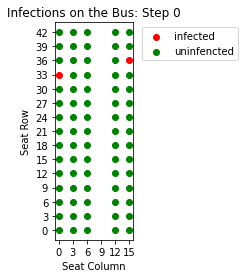

In [10]:
specific_step_model(nmodel, step_num)

We've also got a method that allows us to save multiple images of the steps over time. The visualize_step_model (which is located in src/visualization.py) allows you set a few parameters regarding the duration of the trip and breath consistency. It also allows you to modify the destination where the images will be stored.

In [11]:
# Trip Parameters: 
# number of "breathes" or respiratory actions per minute; 14 is the average 
breathes_per_min = 14

# how long a trip is (in minutes)
trip_duration = 2 

#------------------------------------------------------------------------------
# File Configuration Parameters: 
# The name of the folder that will hold all visualizations and images 
main_folder = "data"

# the file path of the folder that will hold all the images of the simulation 
destination = "data/raw/"

In [12]:
visualize_step_model(nmodel, breathes_per_min, trip_duration, main_folder, destination)

As a final visualization, we create a timelapse of the entire trip. The timelapse_step_model (which is located in src/timelapse.py) outputs a .gif of the entire trip, which is saved in the user's destination of choice. 

In [13]:
# Parameters:
# Where the images are located; should be the same as the destination parameter in visualize_step_model
input_source = "data/raw/"

# where the .gif will be saved 
output_source = "data/timelapse/"

In [14]:
timelapse_step_model(input_source, output_source)